In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_roc_curve
from operator import itemgetter

%matplotlib inline
plt.style.use('ggplot')

# Support Vector Classifier

In [2]:
np.random.seed(1)

X = np.random.normal(size=(20, 2))
y = np.repeat([-1, 1], 10)

X[y == 1] += 1

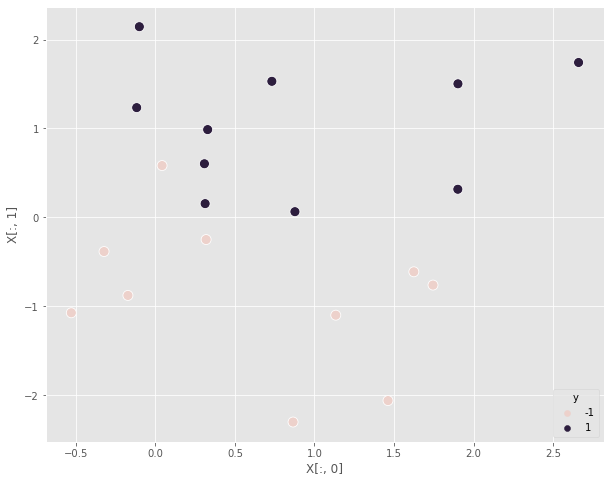

In [3]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, s=100)

plt.xlabel('X[:, 0]')
plt.ylabel('X[:, 1]')

plt.legend(title='y', loc='lower right')

plt.show()

In [4]:
def plot_svc(svc, X, y, h=.02, pad=.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    plt.contourf(xx, yy, z, cmap=plt.cm.Paired, alpha=.2)
    scatter = plt.scatter(X[:, 0], X[:, 1], s=70, c=y, cmap=plt.cm.Paired)

    sv = svc.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], s=100, c='k', marker='x', linewidths=1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')

    plt.legend(*scatter.legend_elements(), loc="lower right", title="y")
    plt.show()

    print('Number of support vectors: ', svc.support_.size)
    print('Indices: ', svc.support_)

In [5]:
svc = SVC(C=10, kernel='linear')
svc.fit(X, y)

SVC(C=10, kernel='linear')

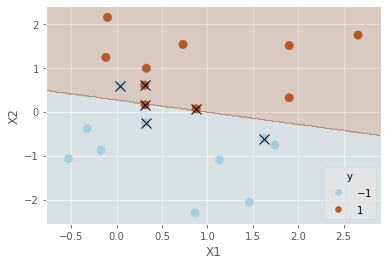

Number of support vectors:  6
Indices:  [ 0  4  9 13 15 16]


In [6]:
plot_svc(svc, X, y)

In [7]:
svc = SVC(C=.1, kernel='linear')
svc.fit(X, y)

SVC(C=0.1, kernel='linear')

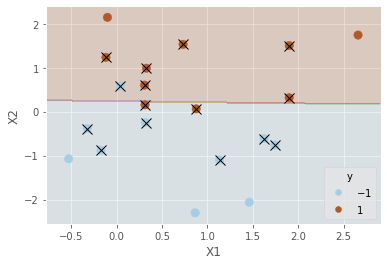

Number of support vectors:  15
Indices:  [ 0  3  4  6  7  8  9 11 12 13 14 15 16 17 18]


In [8]:
plot_svc(svc, X, y)

In [9]:
np.random.seed(1)

kf10 = KFold(10, shuffle=True)

Cs = [.001, .01, .1, 1, 5, 10, 100]
res = []

for C in Cs:
    svc = SVC(C=C, kernel='linear')
    res.append((svc, -cross_val_score(svc, X, y, cv=kf10, scoring='neg_mean_squared_error').mean()))

In [10]:
best_svc, min_mse = min(res, key=itemgetter(1))
best_svc.get_params()['C'], min_mse

(1, 0.4)

In [11]:
best_svc.fit(X, y)

best_svc.support_

array([ 0,  3,  4,  6,  9, 12, 13, 15, 16])

In [12]:
np.random.seed(2)

X_test = np.random.normal(size=(20, 2))
y_test = np.random.choice([-1, 1], 20)

X_test[y_test == 1] += 1

In [13]:
pred = best_svc.predict(X_test)

In [14]:
inds = pd.MultiIndex.from_product([['Pred'], best_svc.classes_])
cols = pd.MultiIndex.from_product([['True'], best_svc.classes_])

pd.DataFrame(confusion_matrix(pred, y_test).T, index=inds, columns=cols)

True   
          -1  1
Pred -1   11  5
      1    1  3

In [15]:
svc = SVC(C=.01, kernel='linear')
svc.fit(X, y)

pred = svc.predict(X_test)

In [16]:
inds = pd.MultiIndex.from_product([['Pred'], svc.classes_])
cols = pd.MultiIndex.from_product([['True'], svc.classes_])

pd.DataFrame(confusion_matrix(pred, y_test).T, index=inds, columns=cols)

True   
          -1  1
Pred -1   11  5
      1    1  3

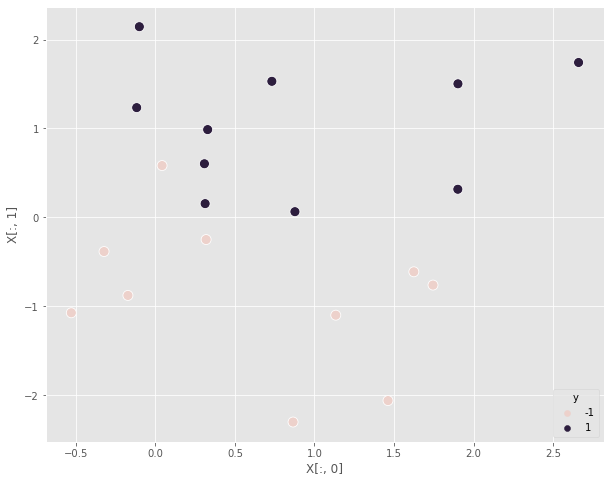

In [17]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, s=100)

plt.xlabel('X[:, 0]')
plt.ylabel('X[:, 1]')

plt.legend(title='y', loc='lower right')

plt.show()

In [18]:
svc = SVC(C=10**5, kernel='linear')
svc.fit(X, y)

SVC(C=100000, kernel='linear')

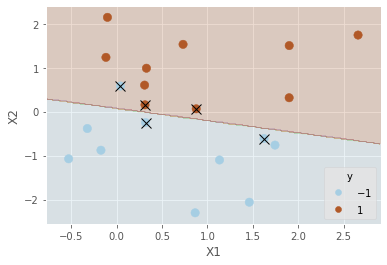

Number of support vectors:  5
Indices:  [ 0  4  9 13 16]


In [19]:
plot_svc(svc, X, y)

In [20]:
svc = SVC(C=1, kernel='linear')
svc.fit(X, y)

SVC(C=1, kernel='linear')

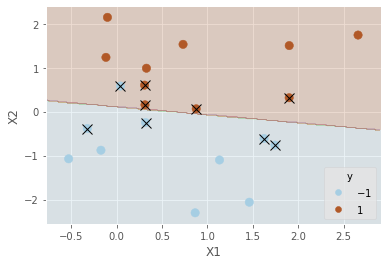

Number of support vectors:  9
Indices:  [ 0  3  4  6  9 12 13 15 16]


In [21]:
plot_svc(svc, X, y)

# Support Vector Machine

In [22]:
np.random.seed(1)

X = np.random.normal(size=(200, 2))
X[:100, ] += 2
X[100:150, ] -= 2
y = np.repeat([1, 2], [150, 50])

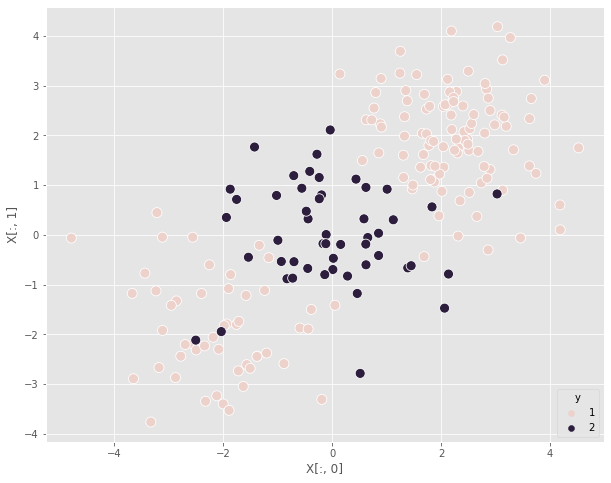

In [23]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, s=100)

plt.xlabel('X[:, 0]')
plt.ylabel('X[:, 1]')

plt.legend(title='y', loc='lower right')

plt.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.5, shuffle=True, random_state=1)

In [27]:
svc = SVC(gamma=1)
svc.fit(X_train, y_train)

SVC(gamma=1)

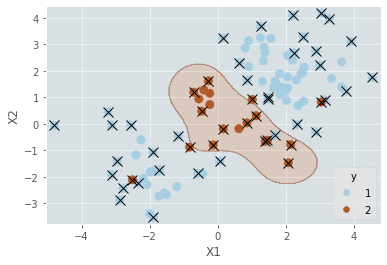

Number of support vectors:  50
Indices:  [ 0  1  2  4  9 14 17 19 20 31 34 35 36 39 41 48 49 51 52 55 58 67 68 71
 73 75 76 77 85 90 92 95 96 98 99  3  7 11 15 23 40 43 47 56 60 64 74 81
 82 87]


In [28]:
plot_svc(svc, X_train, y_train)

In [29]:
svc = SVC(gamma=1, C=10**5)
svc.fit(X_train, y_train)

SVC(C=100000, gamma=1)

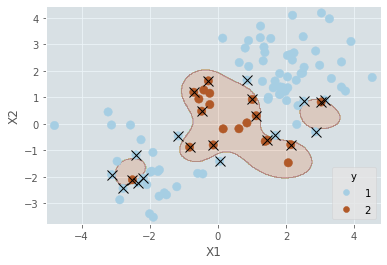

Number of support vectors:  23
Indices:  [ 0  4 27 33 34 41 51 67 73 78 92 98  3 11 15 23 40 43 47 56 64 74 81]


In [30]:
plot_svc(svc, X_train, y_train)

In [33]:
np.random.seed(1)

kf10 = KFold(10, shuffle=True)
tuned_pars = [{'C': [.1, 1, 10, 100, 1000], 'gamma':[.5, 1, 2, 3, 4]}]

clf = GridSearchCV(SVC(), tuned_pars, cv=kf10, scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [0.5, 1, 2, 3, 4]}],
             scoring='accuracy')

In [34]:
best_svc = clf.best_estimator_
best_svc

SVC(C=1, gamma=0.5)

In [35]:
pred = best_svc.predict(X_test)

In [36]:
inds = pd.MultiIndex.from_product([['Pred'], best_svc.classes_])
cols = pd.MultiIndex.from_product([['True'], best_svc.classes_])

pd.DataFrame(confusion_matrix(pred, y_test).T, index=inds, columns=cols)

True    
          1   2
Pred 1   70   0
     2   10  20

# ROC Curves

In [38]:
np.random.seed(1)

X = np.random.normal(size=(200, 2))
X[:100, ] += 2
X[100:150, ] -= 2
y = np.repeat([1, 2], [150, 50])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.5, shuffle=True, random_state=1)

In [40]:
svc_opt = SVC(gamma=2)
svc_opt.fit(X_train, y_train)

SVC(gamma=2)

In [41]:
svc_flex = SVC(gamma=50)
svc_flex.fit(X_train, y_train)

SVC(gamma=50)

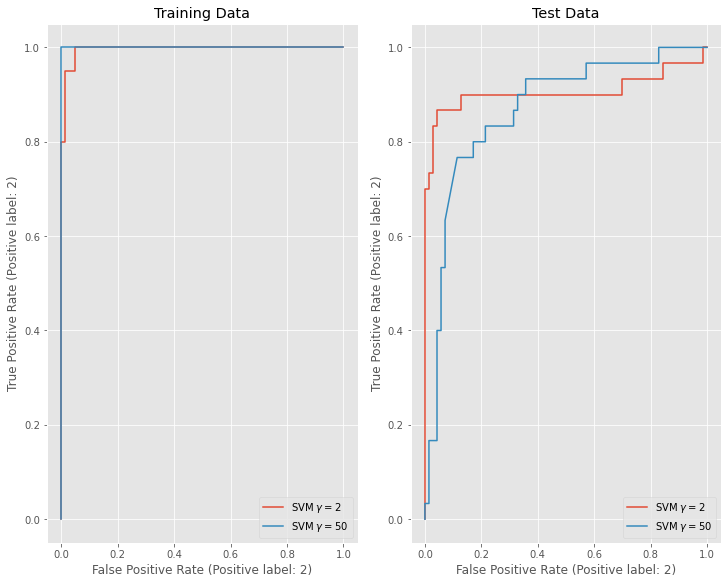

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8), constrained_layout=True)

plot_roc_curve(svc_opt, X_train, y_train, ax=axes[0], label='SVM $\gamma=2$')
plot_roc_curve(svc_flex, X_train, y_train, ax=axes[0], label='SVM $\gamma=50$')
axes[0].set_title('Training Data')

plot_roc_curve(svc_opt, X_test, y_test, ax=axes[1], label='SVM $\gamma=2$')
plot_roc_curve(svc_flex, X_test, y_test, ax=axes[1], label='SVM $\gamma=50$')
axes[1].set_title('Test Data')

plt.show()

# SVM with Multiple Classes

In [43]:
np.random.seed(1)

X = np.random.normal(size=(250, 2))
X[:100, ] += 2
X[100:150, ] -= 2
y = np.repeat([1, 2, 0], [150, 50, 50])

In [44]:
X[y == 0, 1] += 2

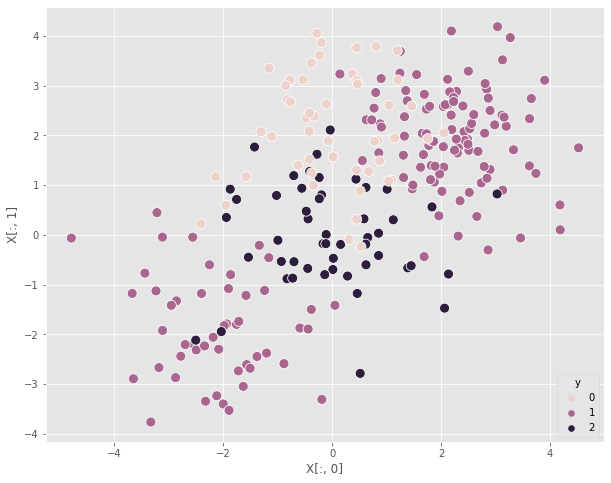

In [45]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, s=100)

plt.xlabel('X[:, 0]')
plt.ylabel('X[:, 1]')

plt.legend(title='y', loc='lower right')

plt.show()

In [46]:
svc = SVC(C=10, gamma=1)
svc.fit(X, y)

SVC(C=10, gamma=1)

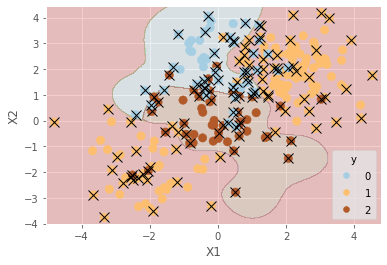

Number of support vectors:  129
Indices:  [200 201 203 204 205 206 207 209 211 212 214 215 216 217 218 219 220 221
 224 227 229 230 231 232 234 235 237 238 239 240 242 243 244 245 247 248
   1   2   3   5   7  10  14  15  16  17  21  23  26  30  35  42  43  44
  48  52  54  55  58  61  62  64  66  68  71  75  76  80  84  86  89  94
  96  97 100 101 102 103 112 113 116 120 124 125 126 128 130 131 135 136
 140 143 144 145 147 149 150 151 152 154 157 158 162 163 164 165 166 167
 168 169 170 174 175 176 178 180 181 183 184 185 187 188 189 191 192 194
 195 198 199]


In [47]:
plot_svc(svc, X, y)

# Application to Gene Expression Data

In [48]:
X_train = pd.read_csv('./Downloads/Khan_xtrain.csv', index_col=0)
X_test = pd.read_csv('./Downloads/Khan_xtest.csv', index_col=0)
y_train = pd.read_csv('./Downloads/Khan_ytrain.csv', index_col=0, squeeze=True)
y_test = pd.read_csv('./Downloads/Khan_ytest.csv', index_col=0, squeeze=True)

In [49]:
X_train.shape, X_test.shape

((63, 2308), (20, 2308))

In [50]:
y_train.shape, y_test.shape

((63,), (20,))

In [51]:
y_train.value_counts(sort=False)

1     8
2    23
3    12
4    20
Name: x, dtype: int64

In [52]:
y_test.value_counts(sort=False)

1    3
2    6
3    6
4    5
Name: x, dtype: int64

In [53]:
svc = SVC(C=10, kernel='linear')
svc.fit(X_train, y_train)

SVC(C=10, kernel='linear')

In [54]:
pred = svc.predict(X_train)

In [55]:
inds = pd.MultiIndex.from_product([['Pred'], svc.classes_])
cols = pd.MultiIndex.from_product([['True'], svc.classes_])

pd.DataFrame(confusion_matrix(pred, y_train).T, index=inds, columns=cols)

True            
          1   2   3   4
Pred 1    8   0   0   0
     2    0  23   0   0
     3    0   0  12   0
     4    0   0   0  20

In [56]:
pred = svc.predict(X_test)

In [57]:
inds = pd.MultiIndex.from_product([['Pred'], svc.classes_])
cols = pd.MultiIndex.from_product([['True'], svc.classes_])

pd.DataFrame(confusion_matrix(pred, y_test).T, index=inds, columns=cols)

True         
          1  2  3  4
Pred 1    3  0  0  0
     2    0  6  0  0
     3    0  2  4  0
     4    0  0  0  5